#### Importing packages

In [ ]:
import pandas as pd
import numpy as np
import statistics
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

#### Loading dataset to dataframe

In [ ]:
dataset = pd.read_csv("games.csv")

#### Data preprocessing

In [ ]:
dataset.drop('sort_no', axis=1, inplace=True)
dataset.rename(columns={'metascore' : 'rating'}, inplace=True)
dataset

In [ ]:
# Математичне сподівання
round(dataset['rating'].mean(), 3) 

In [ ]:
# Медіана
dataset['rating'].median()

In [ ]:
# Мода
dataset['rating'].mode()

In [7]:
# Дисперсія
round(statistics.pvariance(dataset['rating']), 3)

147.981

In [8]:
# Середньоквадратичне відхилення
round(statistics.pstdev(dataset['rating']), 3)

12.165

#### Data visualisation

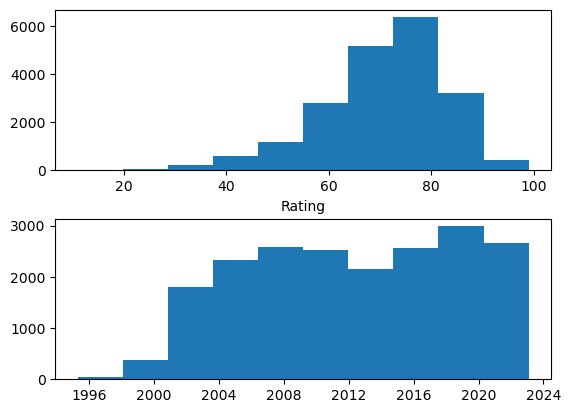

In [9]:
figure, (ax1,ax2) = plt.subplots(2,1)
ax1.hist(dataset['rating'])
ax1.set_xlabel('Rating')
df = pd.to_datetime(dataset['release_date'], format='%B %d, %Y')
ax2.hist(df)
figure.subplots_adjust(hspace=0.3)

#### pd.Series practise

In [10]:
ratings = pd.Series(dataset['rating'])
ratings

0        91
1        91
2        91
3        91
4        91
         ..
20017    17
20018    17
20019    17
20020    16
20021    11
Name: rating, Length: 20022, dtype: int64

In [11]:
pd.Series(10, range(6))

0    10
1    10
2    10
3    10
4    10
5    10
dtype: int64

In [12]:
ratings[10]

91

In [13]:
ratings.count()

20022

In [14]:
ratings.max()

99

In [15]:
ratings.mean()

70.75856557786435

In [16]:
pd.Series(dataset['rating']).describe()

count    20022.000000
mean        70.758566
std         12.165042
min         11.000000
25%         64.000000
50%         72.000000
75%         80.000000
max         99.000000
Name: rating, dtype: float64

In [17]:
pd.Series([25, 30, 35], index=['index1', 'index2', 'index3'])

index1    25
index2    30
index3    35
dtype: int64

In [18]:
dict_ex = {f'string{x+1}': x for x in range(5)}
example = pd.Series(dict_ex)

In [19]:
example['string3']

2

#### pd.Dataframe practise

In [20]:
df_names = pd.DataFrame({'name': {0: 'Anya', 1: 'Vasya', 2: 'Kolya', 3:'Sanya', 4:'Zheka'},
 'age': {0: 25, 1: 30, 2: 35, 3:27, 4:21},
 'country': {0: 'USA', 1: 'Canada', 2: 'Australia', 3:'Ukraine', 4:'Ukraine'}})
df_names

,name,age,country
0,Anya,25,USA
1,Vasya,30,Canada
2,Kolya,35,Australia
3,Sanya,27,Ukraine
4,Zheka,21,Ukraine


In [21]:
df_names.index = [f'index{x+1}' for x in range(5)]
df_names

,name,age,country
index1,Anya,25,USA
index2,Vasya,30,Canada
index3,Kolya,35,Australia
index4,Sanya,27,Ukraine
index5,Zheka,21,Ukraine


In [22]:
df_names['name']

index1     Anya
index2    Vasya
index3    Kolya
index4    Sanya
index5    Zheka
Name: name, dtype: object

In [23]:
df_names.country

index1          USA
index2       Canada
index3    Australia
index4      Ukraine
index5      Ukraine
Name: country, dtype: object

In [24]:
df_names.loc['index1']

name       Anya
age          25
country     USA
Name: index1, dtype: object

In [25]:
df_names.iloc[2]

name           Kolya
age               35
country    Australia
Name: index3, dtype: object

In [26]:
df_names.loc['index1':'index3']

,name,age,country
index1,Anya,25,USA
index2,Vasya,30,Canada
index3,Kolya,35,Australia


In [27]:
df_names.iloc[2:4]

,name,age,country
index3,Kolya,35,Australia
index4,Sanya,27,Ukraine


In [28]:
df_names.loc[['index5','index1']]

,name,age,country
index5,Zheka,21,Ukraine
index1,Anya,25,USA


In [29]:
df_names.iloc[[2,4]]

,name,age,country
index3,Kolya,35,Australia
index5,Zheka,21,Ukraine


In [30]:
df = pd.DataFrame({'column1':[5, 23, 3], 'column2':[13, -4, 6], 'column3':[7, 11, 9]}, index=['index1', 'index2', 'index3'])
df

,column1,column2,column3
index1,5,13,7
index2,23,-4,11
index3,3,6,9


In [31]:
df[df>7]

,column1,column2,column3
index1,NaN,13.0,NaN
index2,23.0,NaN,11.0
index3,NaN,NaN,9.0


In [32]:
df[(df >= 10) & (df <= 20)]

,column1,column2,column3
index1,NaN,13.0,NaN
index2,NaN,NaN,11.0
index3,NaN,NaN,NaN


In [33]:
df.at['index1', 'column2']

13

In [34]:
df.iat[2,0]

3

In [35]:
df.describe()

,column1,column2,column3
count,3.000000,3.000000,3.0
mean,10.333333,5.000000,9.0
std,11.015141,8.544004,2.0
min,3.000000,-4.000000,7.0
25%,4.000000,1.000000,8.0
50%,5.000000,6.000000,9.0
75%,14.000000,9.500000,10.0
max,23.000000,13.000000,11.0


In [36]:
pd.set_option('display.precision', 1)
df.describe()

,column1,column2,column3
count,3.0,3.0,3.0
mean,10.3,5.0,9.0
std,11.0,8.5,2.0
min,3.0,-4.0,7.0
25%,4.0,1.0,8.0
50%,5.0,6.0,9.0
75%,14.0,9.5,10.0
max,23.0,13.0,11.0


In [37]:
df.T

,index1,index2,index3
column1,5,23,3
column2,13,-4,6
column3,7,11,9


In [38]:
df.T.describe()

,index1,index2,index3
count,3.0,3.0,3.0
mean,8.3,10.0,6.0
std,4.2,13.5,3.0
min,5.0,-4.0,3.0
25%,6.0,3.5,4.5
50%,7.0,11.0,6.0
75%,10.0,17.0,7.5
max,13.0,23.0,9.0


In [39]:
df.sort_index(ascending=False)

,column1,column2,column3
index3,3,6,9
index2,23,-4,11
index1,5,13,7


In [40]:
df.sort_index(axis=1, ascending=False)

,column3,column2,column1
index1,7,13,5
index2,11,-4,23
index3,9,6,3


In [41]:
df_names.sort_values(by='age', ascending=False)

,name,age,country
index3,Kolya,35,Australia
index2,Vasya,30,Canada
index4,Sanya,27,Ukraine
index1,Anya,25,USA
index5,Zheka,21,Ukraine


In [42]:
dataset.sort_index(axis=1, ascending=False)

,title,summary,release_date,rating,platform,id
0,Microsoft Flight Simulator,"From light planes to wide-body jets, fly highl...","August 18, 2020",91,PC,543718
1,Chained Echoes,"Take up your sword, channel your magic or boar...","December 8, 2022",91,PC,555108
2,Guitar Hero,"Strap on your Guitar Hero SG controller, plug-...","November 7, 2005",91,PlayStation 2,106820
3,World of Warcraft: Wrath of the Lich King,"Players last visited Northrend in ""Warcraft II...","November 13, 2008",91,PC,110775
4,Rock Band 3,Rock Band returns with the third iteration of ...,"October 26, 2010",91,Wii,142864
...,...,...,...,...,...,...
20017,Vroom in the Night Sky,Vroom in the night sky is a magical bike actio...,"April 5, 2017",17,Switch,507544
20018,Leisure Suit Larry: Box Office Bust,The Leisure Suit Larry: Box Office Bust video ...,"May 5, 2009",17,PlayStation 3,111627
20019,Yaris,[Xbox Live Arcade] Hop into a Toyota Yaris an...,"October 10, 2007",17,Xbox 360,111235
20020,Ride to Hell: Retribution,The game is set in the last years of the roari...,"June 24, 2013",16,PC,112727


# Titanic survivals data

In [43]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv').rename(columns={'Unnamed: 0': 'name', 'passengerClass':'class'})

In [44]:
df.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0,1st


In [45]:
df.tail()

,name,survived,sex,age,class
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [46]:
df[df['age']==df['age'].max()]

,name,survived,sex,age,class
14,"Barkworth, Mr. Algernon Henry W",yes,male,80.0,1st


In [47]:
df[df['age']==df['age'].min()]

,name,survived,sex,age,class
763,"Dean, Miss. Elizabeth Gladys M",yes,female,0.2,3rd


In [48]:
round(df['age'].mean(),2)

29.88

In [49]:
byClass = df[(df['class']=='1st') & (df['sex']=='female')].sort_values(by='age', ascending=False)

In [50]:
byClass.max()

name        Young, Miss. Marie Grice
survived                         yes
sex                           female
age                             76.0
class                            1st
dtype: object

In [51]:
byClass.min()

name        Allen, Miss. Elisabeth Walton
survived                               no
sex                                female
age                                   2.0
class                                 1st
dtype: object

In [52]:
print(f"Total amount of survived women: {dict(Counter(byClass['survived']))['yes']}")

Total amount of survived women: 139


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

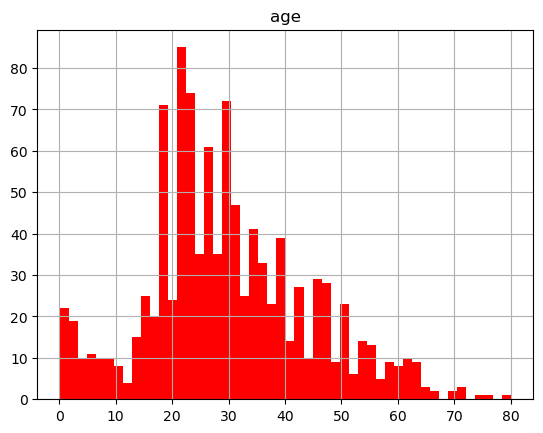

In [53]:
df.hist(color='red', bins=50)